Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

C:\Users\Nero_\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
priceFmt = mpl.ticker.StrMethodFormatter("${x:,.0f}")

def plot_data(X,y,xlabel,ylabel='Price'):
    """ Code courtesy of James Irving"""
    fig, ax = plt.subplots()
    
    ax.scatter(X,y,marker='.')
    
    ax.set(xlabel=xlabel,ylabel=ylabel)
    ax.set_title(f'{xlabel} vs {ylabel}')
    
    ax.yaxis.set_major_formatter(priceFmt)
    return fig,ax

In [4]:
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['figure.figsize'] = (15,10)

## Obtain

In [6]:
## Reading in data from CSV and create a copy to work on  
info = pd.read_csv('kc_house_data.csv')
data = info.copy()

In [7]:
## Cursory inspection of data
display(data.head(30))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,3,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,3,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,3,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [8]:
## Check data types and possible missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Initial Scrub and Explore


In [9]:
## Convert data to date-time object

data['date'] = pd.to_datetime(data['date'])

In [10]:
## Check for null values for cleaning up

print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
print('Data shape is: ', data.shape)

Data shape is:  (21597, 21)


### Dealing with View Nulls

Starting with the `View` column because it contains the least null values and therefore it is safe to just drop them all with no prior assumptions about the data.

In [12]:
## Checking view column data since it had the fewest null values
## Replace with the median of 0

print('View has',round(data['view'].isnull().sum()/len(data)*100,3),'% null values')
print('View median is:', data['view'].median())
data.view.value_counts()
data['view'] = data['view'].fillna(data['view'].median())
print('View now has',data['view'].isnull().sum(), 'null values')

View has 0.292 % null values
View median is: 0.0
View now has 0 null values


### Dealing with Waterfront Nulls

Looking now towards the `waterfront` column in our data we van see that there are clearly several missing datapoints that need to be addressed. Below we look at the data as a heatmap as plotted on a scatter plot. It is clear that the majority of the values of the data are not waterfront by looking at the points and comparing the two plots. Therefore we will fill the nulls values within waterfront as being 0, so not a `waterfront` property.

In [13]:
## Folium view of the null values in waterfront by lat and long
## the map was slow loading and cluttered, legacy code

# import folium

data['waterfront'] = data['waterfront'].fillna(2)
nullwf = data[data['waterfront'] == 2]
# nullwf['id'] = nullwf['id'].astype('str')
# lat = list(round(nullwf['lat'],3))
# long = list(round(nullwf['long'],3))
# latlong = list(zip(lat, long))

# m = folium.Map(location=[47.6848, -122.016],
#               zoom_start=10)

# # for lat in latlong:
# #     folium.Marker(lat)
    
# for i in range(0,len(nullwf)):
#     folium.Marker([nullwf.iloc[i]['lat'], nullwf.iloc[i]['long']]).add_to(m)

# m

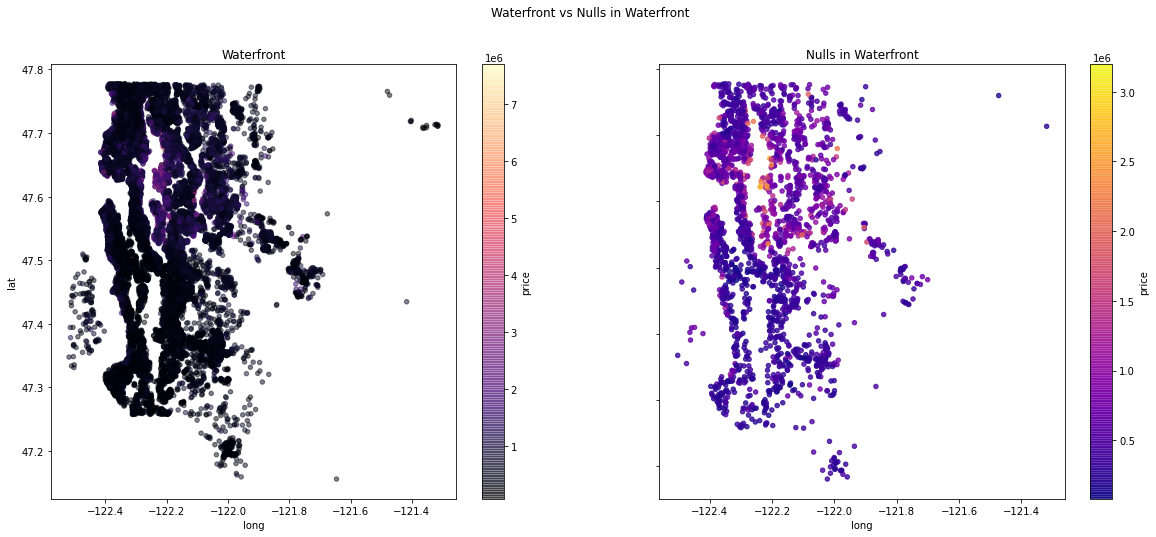

In [14]:
fig, axes = plt.subplots(ncols=2)

data.plot.scatter(x='long', y='lat', c='price', alpha=.5, figsize=(20,8), 
                  cmap='magma', sharey=True, sharex=False, ax=axes[0])
axes[0].set_title('Waterfront')

nullwf.plot.scatter(x='long', y='lat', c='price', alpha=.8, figsize=(20,8), 
                  cmap='plasma', sharey=True, sharex=False, ax=axes[1])
axes[1].set_title('Nulls in Waterfront')

plt.suptitle('Waterfront vs Nulls in Waterfront')
plt.show()

In [15]:
## Check waterfront for nulls and impute the median (0) of the column
## for missing values

print('Waterfront has', round((len(nullwf)/len(data))*100), '% missing values,')
print('Waterfront median:', data['waterfront'].median())

data['waterfront'] = data['waterfront'].replace(2, 1)
data.astype({'waterfront':'int64'}, copy=False)
print('Waterfront now has',data['waterfront'].isnull().sum(), 'null values')

Waterfront has 11 % missing values,
Waterfront median: 0.0
Waterfront now has 0 null values


### Dealing with Year Renovated nulls

 Taking a look at the nulls within the `yr_renovated`, it is impossible to inuit if a house has been renovated from the provided data. Therefore we will just fill the null values within the column with 0 to signify that this house has not been renovated.

In [16]:
## Checking yr_renovated for missing values and filling in

print('Year Renovated has',round(data['yr_renovated'].isnull().sum()/len(data)*100,3),'% null values')
data['yr_renovated'] = data['yr_renovated'].fillna(0)
print('Year Renovated mode:', data['waterfront'].mode())
print('Year Renovated now has',data['yr_renovated'].isnull().sum(), 'null values')

Year Renovated has 17.79 % null values
Year Renovated mode: 0   0.000
dtype: float64
Year Renovated now has 0 null values


Now we have dealt with the null values within the data set. It is time to turn our attention towards our data types to make sure that our data is in the correct type for further analysis and eventually modeling.

In [17]:
## Nulls imputed

print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Datatype corrections


Looking forward into the further modeling it is important for our data to be in the correct types. There are several categorical types that are cast as `int` or `float`, and could be converted into a pandas `cat` objects for future use. 

Furthermore, if we take a look at `sqft_basement` we notice that it is cast as an object and is therefore a string. This data needs to be converted into an `int` or a `float` depending on the data.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [19]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.117,0.233,3.410,7.658,1788.597,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.321,0.765,0.651,1.173,827.760,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [20]:
## Replace question marks in `sqft_basement` 

# data['sqft_basement'] = data['sqft_basement'].replace('?',0)
data['sqft_basement'] = data['sqft_living'] - data['sqft_above']
# data['sqft_basement'] = data['sqft_basement'].replace(0.0,0)
# data['sqft_basement'] = data['sqft_basement'].astype('float64')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,1.000,0.000,3,7,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,1933,0.000,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503


Let's take a look at the categories that should be converted to categorical data types to better be fed into our model. 
* Waterfront - A boolean of is it waterfront or not, therefore categorical.
* Grade - A grade for the home that is given by an assessor for the county, not continuous and therefore categorical. 
* View - A rating of the view from 0 to 4, therefore categorical. 

Along these same lines we are going to convert the `yr_built` column into categorical variables by slicing them into bins of 1 decade (10 years) starting in 1900 and ending in 2020.

Considering the amount of non-renovated or houses with missing renovation data we have elected to drop the column because the few non-values will provide little to no meaningful data.

We are going to also look at binning the zipcode data to get general area vs price data as well.

In [21]:
## Cutting the years into bins for the cut method

decades = list(range(1899, 2020, 10))
lbls = ["1900","1910","1920","1930","1940","1950","1960","1970","1980",
          "1990", "2000","2010"]

## Cutting out the data into decades and dropping the aforementioned columns

data['decade_built'] = pd.cut(data['yr_built'],bins=decades,labels=lbls) 
print('Percentage of homes not renovated or without renovation data', 
      round(len(data[data['yr_renovated'] == 0])/len(data)*100,2),'%')
data.drop('yr_renovated', axis=1, inplace=True)
data.drop('yr_built', axis=1, inplace=True)

Percentage of homes not renovated or without renovation data 96.56 %


In [22]:
## Cutting the zipcode data into bins using the qcut method
## thus avoiding the need to use a continuous series of numbers

zips = list(data['zipcode'].value_counts().index)
data['zipcode'] = data['zipcode'].astype('int64')
data['zips'] = pd.cut(data['zipcode'],bins=70,duplicates='drop',labels=False)  
# data.drop('zipcode', axis=1, inplace=True)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,decade_built,zips
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,1.000,0.000,3,7,1180,0,98178,47.511,-122.257,1340,5650,1950,62
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,98125,47.721,-122.319,1690,7639,1950,43
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,98028,47.738,-122.233,2720,8062,1930,9
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,98136,47.521,-122.393,1360,5000,1960,47
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,98074,47.617,-122.045,1800,7503,1980,25


In [23]:
## Sort by date to explore the date information further

data.sort_values(by='date', axis=0, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,decade_built,zips
7316,2202500290,2014-05-02,435000.000,4,1.000,1450,8800,1.000,0.000,0.000,4,7,1450,0,98006,47.575,-122.135,1260,8942,1950,1
20586,7853361370,2014-05-02,555000.000,4,2.500,3310,6500,2.000,0.000,0.000,3,8,3310,0,98065,47.515,-121.870,2380,5000,2010,22
1040,7197300105,2014-05-02,550000.000,4,2.500,1940,10500,1.000,1.000,0.000,4,7,1140,800,98052,47.683,-122.114,2200,10500,1970,18
20543,3438501320,2014-05-02,295000.000,2,2.500,1630,1368,2.000,0.000,0.000,3,7,1280,350,98106,47.549,-122.363,1590,2306,2000,37
9587,472000620,2014-05-02,790000.000,3,2.500,2600,4750,1.000,0.000,0.000,4,9,1700,900,98117,47.683,-122.400,2380,4750,1950,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.000,4,1.750,1980,5850,1.000,1.000,1.000,4,8,1380,600,98116,47.561,-122.391,1810,5850,1960,40
12623,4166600610,2015-05-14,335000.000,3,2.000,1410,44866,1.000,0.000,0.000,4,7,1410,0,98023,47.327,-122.370,2950,29152,1980,7
5632,7923600250,2015-05-15,450000.000,5,2.000,1870,7344,1.500,0.000,0.000,3,7,1870,0,98007,47.595,-122.144,1870,7650,1960,2
13040,5101400871,2015-05-24,445500.000,2,1.750,1390,6670,1.000,0.000,0.000,3,6,720,670,98115,47.691,-122.308,920,6380,1940,40


In [24]:
## The data stretches 13 months acorss 2 years, from May 2014 to May 2015,
## So the months have been binned into 13 bins and labeled according to month

data['month_sold'] = pd.cut(data['date'],bins=13, labels=
                           range(1,14))
data['month_sold'].value_counts()


2     2286
3     2096
12    2084
4     1936
6     1806
1     1775
11    1758
5     1719
7     1530
10    1331
8     1322
9      991
13     963
Name: month_sold, dtype: int64

In [25]:
print(list(range(1,14)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [26]:
# ## Typing data as category objects in the dataframe, moved to a lower cell

# cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zips']
# data[cat_cols] = data[cat_cols].astype('category')

### Correlation and Linearity

Now, we can take a further look at correlation amongst our columns to see if there are any obvious columns to drop as they do not pertain to the sales price of the houses.

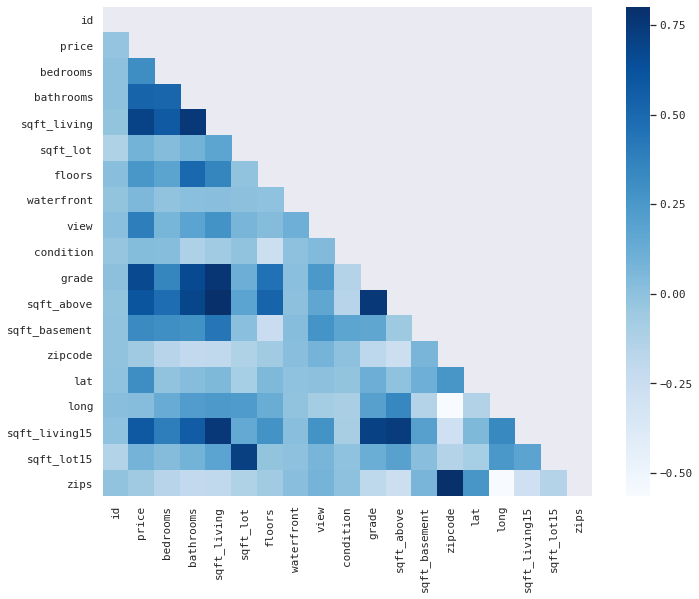

In [27]:
## Heatmap to see general correlation of all data to extract 
## data for further analysis

sns.set(context="notebook", font="monospace")
corrmat = data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cmap='Blues');

Upon inspection a few elements can be seen to have no correlation to the price of the houses. Mainly we are looking at the `id` column. Next we can consider a couple more drops we could safely make, namely the `lat` and `long` columns as our area based predictions are being covered by our binned zipcodes. Therefore we are going to drop the `id`, `lat`, and `long` columns from our data so that we can further process it for modeling. 

Finally, our `date` data has been binned into `month_sold` and our original `date` `datetime` column can be dropped from the dataframe.

In [28]:
## Drop the aforementioned columns and check the dataframe

data.drop(labels=['id','lat','long', 'date'], axis=1, inplace=True)

In [29]:
from ipywidgets import interact

In [30]:
target=data['price']

def plot_col(df,col,target='price'):
    """Create a seaborn jointplot to show both linearity and distribution 
    df = Dataframe you are looking to operate on
    col = str or list: Column you wish to be the x axis
    target = string: Column you wish to be the Y axis in you graph, default: 'price'
    """
    
    plot = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return plot

In [31]:
## Separate categorical columns from the numerical and save the numerical

cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zips']

num_cols = list(data.columns)
num_cols = [x for x in num_cols if x not in cat_cols]
num_cols.remove('price')

In [32]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

Now we have a pretty good idea of what our data is looking like. It is important to note a couple of things though:

* A lot of the data does appear normal, which is good for our modeling assumptions.
* There seems to be a general linear relationship between price and our various columns. 

impactful things to note for modeling:
* There are numerous outliers that will effect our model drastically
* There are some remaining features that look conditional, or could be converted to conditional if the needed arises after modeling.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7316 to 16580
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  float64 
 7   view           21597 non-null  float64 
 8   condition      21597 non-null  int64   
 9   grade          21597 non-null  int64   
 10  sqft_above     21597 non-null  int64   
 11  sqft_basement  21597 non-null  int64   
 12  zipcode        21597 non-null  int64   
 13  sqft_living15  21597 non-null  int64   
 14  sqft_lot15     21597 non-null  int64   
 15  decade_built   21597 non-null  category
 16  zips           21597 non-null  int64   
 17  month_sold     21597 non-nul

### Outlier Removal

In [34]:
## Continuous
cols = list(data.select_dtypes('int64').columns)
cols.append('bathrooms')
cols.append('price')

In [35]:
iqr_dict = {}

for col in cols:
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = (q3 - q1)*1.5
    
    test = data[col].between(q1-iqr,q3+iqr)
    iqr_dict.update({col:test})

In [36]:
## Make a DataFrame of Outliers

outliers = pd.DataFrame(iqr_dict)
outliers = outliers.apply(lambda x: ~x)
outliers['any'] = outliers.any(axis=1)

## Add column of any outliers

print(outliers['any'].value_counts())

index_outliers = outliers['any'].copy()
display(outliers.head(10))

False    16607
True      4990
Name: any, dtype: int64


,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,zips,bathrooms,price,any
7316,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20586,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1040,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20543,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9587,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9578,False,False,True,False,False,False,False,False,False,True,False,False,False,True
11879,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11895,False,False,True,False,False,False,False,False,False,True,False,False,False,True
4959,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3719,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# Outlier data removed from chosen variables 

clean_data = data[~index_outliers].copy()


In [38]:
len(clean_data)

16607

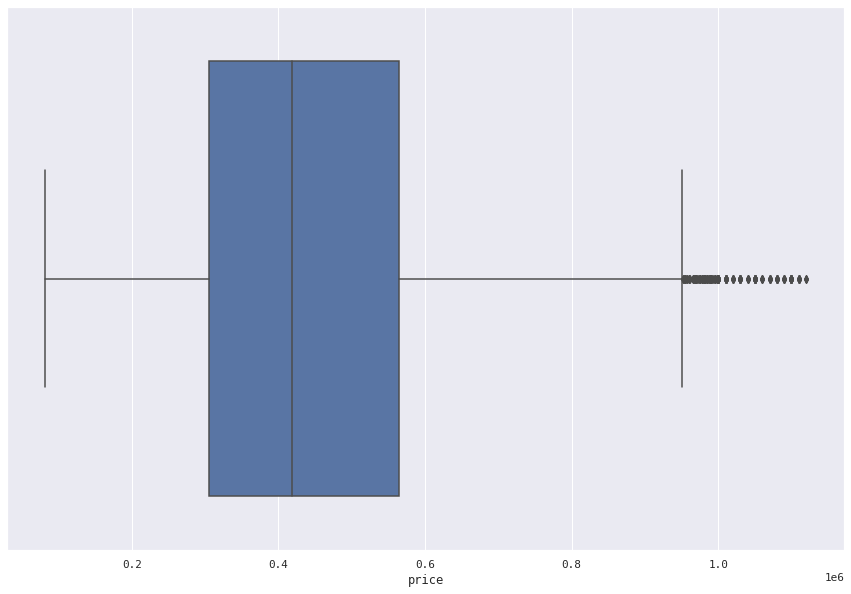

In [39]:
# clean_data.boxplot(column='price')
sns.boxplot(clean_data['price'])

In [40]:
## Typing data as category objects in the dataframe

# cat_cols = ['waterfront', 'grade', 'view', 'condition', 'month_sold', 'zips', 
#             'bedrooms', 'bathrooms']
# clean_data[cat_cols] = clean_data[cat_cols].astype('category')

In [41]:
display(clean_data.describe())
clean_data.info()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,zips
count,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000
mean,452098.896,3.269,1.984,1838.476,7053.725,1.466,0.112,0.133,3.417,7.401,1590.458,248.018,98081.924,1815.432,6932.411,28.181
std,189006.433,0.775,0.649,623.694,3384.479,0.544,0.315,0.550,0.645,0.811,599.001,366.761,54.048,514.711,3016.247,19.099
min,82000.000,2.000,0.750,560.000,520.000,1.000,0.000,0.000,2.000,6.000,480.000,0.000,98001.000,620.000,651.000,0.000
25%,305497.500,3.000,1.500,1360.000,4750.000,1.000,0.000,0.000,3.000,7.000,1150.000,0.000,98033.000,1440.000,4820.000,11.000
50%,419000.000,3.000,2.000,1770.000,7029.000,1.000,0.000,0.000,3.000,7.000,1440.000,0.000,98074.000,1720.000,7169.000,25.000
75%,563975.000,4.000,2.500,2240.000,9000.000,2.000,0.000,0.000,4.000,8.000,1920.000,500.000,98119.000,2130.000,8744.000,41.000
max,1120000.000,5.000,3.500,4200.000,19141.000,3.500,1.000,4.000,5.000,9.000,3740.000,1400.000,98199.000,3640.000,17550.000,69.000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16607 entries, 7316 to 13040
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          16607 non-null  float64 
 1   bedrooms       16607 non-null  int64   
 2   bathrooms      16607 non-null  float64 
 3   sqft_living    16607 non-null  int64   
 4   sqft_lot       16607 non-null  int64   
 5   floors         16607 non-null  float64 
 6   waterfront     16607 non-null  float64 
 7   view           16607 non-null  float64 
 8   condition      16607 non-null  int64   
 9   grade          16607 non-null  int64   
 10  sqft_above     16607 non-null  int64   
 11  sqft_basement  16607 non-null  int64   
 12  zipcode        16607 non-null  int64   
 13  sqft_living15  16607 non-null  int64   
 14  sqft_lot15     16607 non-null  int64   
 15  decade_built   16607 non-null  category
 16  zips           16607 non-null  int64   
 17  month_sold     16607 non-nul

In [42]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(clean_data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

 ## Model 1

In [61]:
def make_model(df, target='price', drop_cols=[], show_sum = True):
    
    """
    Returns model, shows QQplot, shows homoescedascity test
    df - dataframe
    target - Target for estimation
    drop_cols - list of columns to drop, if any
    
    return: Model from statsmodels"""
    
    
    df_ohe = df.copy()

    ## Dropping columns not needed
    for col in drop_cols:
        if col in df_ohe.columns:
            df_ohe.drop(columns=col,inplace=True)
    
    ## Formula and Model
    features = '+'.join(df_ohe.drop(columns=target).columns)
    f = target + '~' + features
    m = smf.ols(f, df_ohe).fit()
    resids = m.resid
    if show_sum:
        display(m.summary())

        ## Plotting
        fig,ax = plt.subplots(ncols=2,figsize=(10,5))
        sm.graphics.qqplot(m.resid,fit=True, line='45', ax=ax[0])
        ax[0].set_title('QQ Plot')
        ax[1].scatter(x=df_ohe[target],y=resids)
        ax[1].axhline(0,color='k')
        ax[1].set(ylabel='Resids',title='Homoscedasticity Check',
                      xlabel='Target Values')
        plt.tight_layout()
        plt.show()

    return m

In [44]:
y = clean_data.price
Xlist = list(clean_data.columns)
Xlist.remove('price')
X = clean_data[Xlist]

In [45]:
# X.drop('zipcode', axis=1, inplace=True)

In [46]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
score = lasso.score(X,y)
importance = np.abs(lasso.coef_)
feature = pd.DataFrame(zip(X.columns, importance), columns=['name','coeff'])
feature

,name,coeff
0,bedrooms,0.000
1,bathrooms,0.000
2,sqft_living,134.392
3,sqft_lot,6.773
4,floors,0.000
5,waterfront,0.000
6,view,0.000
7,condition,0.000
8,grade,0.000
9,sqft_above,0.000


In [47]:
feature = feature[feature['coeff'] > 0]
featlst = list(feature.name)
featlst.append('price')
featlst.remove('sqft_lot')

In [48]:
new_data = clean_data[featlst]

In [49]:
new_data = clean_data

In [50]:
cat_cols = ['zipcode', 'decade_built']

### One-Hot Encoding

In [51]:
## One-Hot encode all the categorical columns for modeling

ohe_clean_data = pd.get_dummies(data=new_data, columns=cat_cols, drop_first=True)

In [52]:
## Sanity check the OHE

ohe_clean_data 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zips,month_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,...,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010
7316,435000.000,4,1.000,1450,8800,1.000,0.000,0.000,4,7,1450,0,1260,8942,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20586,555000.000,4,2.500,3310,6500,2.000,0.000,0.000,3,8,3310,0,2380,5000,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1040,550000.000,4,2.500,1940,10500,1.000,1.000,0.000,4,7,1140,800,2200,10500,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20543,295000.000,2,2.500,1630,1368,2.000,0.000,0.000,3,7,1280,350,1590,2306,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9587,790000.000,3,2.500,2600,4750,1.000,0.000,0.000,4,9,1700,900,2380,4750,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,479349.000,5,3.000,3223,6371,2.000,0.000,0.000,3,9,3223,0,1979,9008,14,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11548,360000.000,4,2.500,2020,7289,2.000,0.000,0.000,3,7,2020,0,2090,7259,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19381,725000.000,4,1.750,1980,5850,1.000,1.000,1.000,4,8,1380,600,1810,5850,40,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5632,450000.000,5,2.000,1870,7344,1.500,0.000,0.000,3,7,1870,0,1870,7650,2,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Model - Basic Model

In [53]:
def clean_columns(data):
    data = data.replace('_', '') 
    data = data.replace(',', '') 
    data = data.replace("'", '')
    data = data.replace(' ', '_')
    data = data.replace('_', '')
    data = data.replace(']', '')
    data = data.replace('(', '')
    data = data.replace('.', '')
    return data

In [54]:
## Creating the framework for the formula to feed into statsmodels

cat_predictors = list(ohe_clean_data.columns)
cat_predictors = [clean_columns(x) for x in cat_predictors] 
ohe_clean_data.columns = cat_predictors
cat_predictors.remove('price')

In [55]:
clean_num_cols = ['sqftliving', 'sqftabove', 'sqftliving15', 'sqftlot15', 'sqftbasement', 'monthsold']
cat_predictors = [x for x in cat_predictors if x not in clean_num_cols]
cat_predictors = ' + '.join(cat_predictors)

In [56]:
num_predictors = ' + '.join(clean_num_cols)
predictors = num_predictors + ' + ' + cat_predictors

In [57]:
target = 'price'
formula = target + ' ~ ' + predictors 
formula

'price ~ sqftliving + sqftabove + sqftliving15 + sqftlot15 + sqftbasement + monthsold + bedrooms + bathrooms + sqftlot + floors + waterfront + view + condition + grade + zips + zipcode98002 + zipcode98003 + zipcode98004 + zipcode98005 + zipcode98006 + zipcode98007 + zipcode98008 + zipcode98010 + zipcode98011 + zipcode98014 + zipcode98019 + zipcode98022 + zipcode98023 + zipcode98024 + zipcode98027 + zipcode98028 + zipcode98029 + zipcode98030 + zipcode98031 + zipcode98032 + zipcode98033 + zipcode98034 + zipcode98038 + zipcode98039 + zipcode98040 + zipcode98042 + zipcode98045 + zipcode98052 + zipcode98053 + zipcode98055 + zipcode98056 + zipcode98058 + zipcode98059 + zipcode98065 + zipcode98070 + zipcode98072 + zipcode98074 + zipcode98075 + zipcode98077 + zipcode98092 + zipcode98102 + zipcode98103 + zipcode98105 + zipcode98106 + zipcode98107 + zipcode98108 + zipcode98109 + zipcode98112 + zipcode98115 + zipcode98116 + zipcode98117 + zipcode98118 + zipcode98119 + zipcode98122 + zipcode98125 

In [58]:
ols_data = ohe_clean_data.copy()
# ols_data.drop('sqftabove', axis=1, inplace=True)

In [60]:
ols_data.describe()

,price,bedrooms,bathrooms,sqftliving,sqftlot,floors,waterfront,view,condition,grade,sqftabove,sqftbasement,sqftliving15,sqftlot15,zips,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,...,zipcode98102,zipcode98103,zipcode98105,zipcode98106,zipcode98107,zipcode98108,zipcode98109,zipcode98112,zipcode98115,zipcode98116,zipcode98117,zipcode98118,zipcode98119,zipcode98122,zipcode98125,zipcode98126,zipcode98133,zipcode98136,zipcode98144,zipcode98146,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,decadebuilt1910,decadebuilt1920,decadebuilt1930,decadebuilt1940,decadebuilt1950,decadebuilt1960,decadebuilt1970,decadebuilt1980,decadebuilt1990,decadebuilt2000,decadebuilt2010
count,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,...,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000,16607.000
mean,452098.896,3.269,1.984,1838.476,7053.725,1.466,0.112,0.133,3.417,7.401,1590.458,248.018,1815.432,6932.411,28.181,0.011,0.015,0.008,0.006,0.017,0.007,0.015,0.002,0.010,0.002,0.008,0.008,0.026,0.001,0.012,0.014,0.017,0.014,0.015,0.006,0.019,0.029,0.029,0.000,0.007,...,0.005,0.033,0.010,0.018,0.015,0.010,0.005,0.009,0.032,0.017,0.030,0.027,0.009,0.015,0.022,0.020,0.028,0.014,0.018,0.015,0.003,0.024,0.011,0.013,0.012,0.014,0.007,0.014,0.015,0.039,0.060,0.021,0.089,0.123,0.130,0.102,0.094,0.086,0.165,0.061
std,189006.433,0.775,0.649,623.694,3384.479,0.544,0.315,0.550,0.645,0.811,599.001,366.761,514.711,3016.247,19.099,0.102,0.121,0.088,0.078,0.131,0.082,0.120,0.048,0.100,0.047,0.089,0.091,0.160,0.036,0.110,0.119,0.128,0.118,0.120,0.080,0.136,0.168,0.167,0.019,0.086,...,0.070,0.180,0.099,0.134,0.122,0.101,0.069,0.096,0.176,0.131,0.172,0.163,0.093,0.122,0.147,0.140,0.166,0.119,0.132,0.122,0.056,0.152,0.105,0.114,0.107,0.119,0.084,0.119,0.120,0.193,0.238,0.145,0.284,0.328,0.336,0.303,0.291,0.280,0.371,0.239
min,82000.000,2.000,0.750,560.000,520.000,1.000,0.000,0.000,2.000,6.000,480.000,0.000,620.000,651.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,305497.500,3.000,1.500,1360.000,4750.000,1.000,0.000,0.000,3.000,7.000,1150.000,0.000,1440.000,4820.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,419000.000,3.000,2.000,1770.000,7029.000,1.000,0.000,0.000,3.000,7.000,1440.000,0.000,1720.000,7169.000,25.000,0.000,0.000,0.000,0.000,0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     803.4
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:51:12   Log-Likelihood:            -2.1037e+05
No. Observations:               16607   AIC:                         4.209e+05
Df Residuals:                   16502   BIC:                         4.218e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.775e+05   1.06e+04    -35.663      0.000   -3.98e+05   -3.57e+05
monthsold[T.2]   7748.0859   2854.428      2.714      0.007    2153.099    1.33e+04
monthsold[T.3]   3398.9368   2961.056      1.148      0.251   -2405.052    9202.926
monthsold[T.4]   2128.3273   3170.930      0.671      0.502   -4087.038    8343.692
monthsold[T.5]    530.5022   3093.494      0.171      0.864   -5533.079    6594.083
monthsold[T.6]  -4763.4057   2966.172     -1.606      0.108   -1.06e+04    1050.610
monthsold[T.7]   2018.1781   3184.739      0.634      0.526   -4224.253    8260.609
monthsold[T.8]   1272.1996   3270.674      0.389      0.697   -5138.674    7683.073
monthsold[T.9]   6067.6904   3948.223      1.537      0.124   -1671.252    1.38e+04
monthsold[T.10]  8339.9966   3198.662      2.607      0.009    2070.275    1.46e+04
monthsold[T.11]  2.432e+04   3011.859      8.076      0.000    1.84e+04    3.02e+04
monthsold[T.12]  3.548e+04   2893.792     12.261      0.000    2.98e+04    4.12e+04
monthsold[T.13]   4.11e+04   3599.455     11.419      0.000     3.4e+04    4.82e+04
bedrooms        -1102.3320   1036.225     -1.064      0.287   -3133.444     928.780
bathrooms        1.367e+04   1608.140      8.501      0.000    1.05e+04    1.68e+04
sqftliving      -2.236e+13   1.59e+13     -1.405      0.160   -5.36e+13    8.84e+12
sqftlot             1.7706      0.384      4.614      0.000       1.018       2.523
floors          -1.728e+04   1968.883     -8.778      0.000   -2.11e+04   -1.34e+04
waterfront       1893.8117   1901.029      0.996      0.319   -1832.410    5620.033
view             3.722e+04   1176.948     31.621      0.000    3.49e+04    3.95e+04
condition        2.405e+04   1071.487     22.447      0.000     2.2e+04    2.62e+04
grade            4.327e+04   1202.212     35.994      0.000    4.09e+04    4.56e+04
sqftabove        2.236e+13   1.59e+13      1.405      0.160   -8.84e+12    5.36e+13
sqftbasement     2.236e+13   1.59e+13      1.405      0.160   -8.84e+12    5.36e+13
sqftliving15       26.0178      1.957     13.292      0.000      22.181      29.855
sqftlot15           0.8430      0.458      1.840      0.066      -0.055       1.741
zips            -9.043e+04   6.77e+04     -1.336      0.182   -2.23e+05    4.23e+04
zipcode98002     9679.4081   7453.077      1.299      0.194   -4929.426    2.43e+04
zipcode98003     5063.3774   6728.089      0.753      0.452   -8124.402    1.83e+04
zipcode98004      6.19e+05   6.82e+04      9.072      0.000    4.85e+05    7.53e+05
zipcode98005     4.284e+05   6.83e+04      6.270      0.000    2.94e+05    5.62e+05
zipcode98006     3.628e+05    6.8e+04      5.334      0.000    2.29e+05    4.96e+05
zipcode98007     4.325e+05   1.36e+05      3.187      0.001    1.67e+05    6.99e+05
zipcode98008     4.286e+05   1.36e+05      3.161      0.002

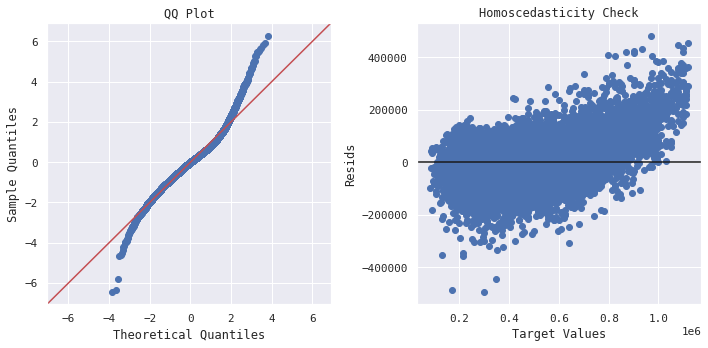

In [59]:
model = make_model(ols_data)

In [ ]:
# params = list(model.params.index)
# params = params[1:6]
# params.append('price')

In [ ]:
# for param in params: 
#     minn = ols_data[param].min()
#     maxx = ols_data[param].max()
#     ols_data[param] = ols_data[param].apply(lambda x: (x-minn) / (maxx-minn))
    
# ols_data

In [ ]:
# for param in params: 
#     ols_data[param] = ols_data[param].apply(lambda x: np.log(x))

In [ ]:
# ols_data = ols_data.replace([np.inf, -np.inf], np.nan)

In [ ]:
# ols_data = ols_data.dropna()

In [ ]:
df = ols_data.copy()
df.corr().abs()

In [ ]:
corrmat = ols_data.corr()
corrmat = corrmat.abs()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, mask=mask, square=True, cmap='GnBu_r');

In [ ]:
vifdf = df.drop(columns=['price'],axis=1)
vifdf = sm.add_constant(vifdf)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifdf = df.drop(columns=['price'],axis=1)
vifdf = sm.add_constant(vifdf)

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
vif = [variance_inflation_factor(vifdf.values, i) for i in tqdm(range(vifdf.shape[1]))]

In [ ]:
vif_results = pd.Series(dict(zip(vifdf.columns, vif)))
vif_results

In [ ]:
threshold = 6
drop_vif = list(vif_results[vif_results>threshold].index)
if 'const' in drop_vif:
    drop_vif.remove('const')
# drop_vif.append('sqftabove')
# drop_vif.append('sqftlot15')
# drop_vif.append('sqftliving15')

In [ ]:
model = make_model(ols_data, drop_cols=[*drop_vif])

In [ ]:
pvalues = model.pvalues[1:].rename('p-values')
pvalues.sort_values(ascending=False,inplace=True)
pvalues

In [ ]:
pvalues[pvalues > .05]

In [ ]:
bcoeffs = list(pvalues[pvalues > .05].index)

In [ ]:
bcoeffs

In [ ]:
model =  make_model(ols_data, drop_cols=[*bcoeffs, *drop_vif])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df_train, df_test = train_test_split(ols_data)
df_train.shape, df_test.shape

In [ ]:
model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs])

In [ ]:
from tqdm import tqdm_notebook as tqdm

# Create loop for best train-test split

In [ ]:
r2dict = {}
r2scores = {}
for x in tqdm(range(0, 20)):
    df_train, df_test = train_test_split(ols_data)
    model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs], show_sum=False)
    r2dict.update({model.rsquared:model})
    y_train = model.predict(df_train)
    y_test = model.predict(df_test)
    r2_train = r2_score(df_train['price'],y_train)
    r2_test = r2_score(df_test['price'],y_test)
    
    r2dict.update({r2_test:[r2_train, model]})
    
#     split.update({model.rsquared:[df_train, df_test]})

In [ ]:
besttest = max(r2dict.items())

In [ ]:
besttest[1]

In [ ]:
bestmodel = max(r2dict.items())

In [ ]:
df_train, df_test = train_test_split(ols_data)

In [ ]:
y_train = besttest[1].predict(df_train)

In [ ]:
y_test = besttest[1].predict(df_test)

In [ ]:
r2_train = r2_score(df_train['price'],y_train)
r2_test = r2_score(df_test['price'],y_test)
print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

In [ ]:
bestmodel[1][1].summary()

In [ ]:
sm.graphics.qqplot(bestmodel[1][1].resid,fit=True, line='45')

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(bestmodel[1][1].resid,  bestmodel[1][1].model.exog)

In [ ]:
bp_test = het_breuschpagan(bestmodel[1][1].resid, bestmodel[1][1].model.exog)

In [ ]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

## Run all above

## Test

In [ ]:

col = list(model_data[sigp_list[:5]].columns)


In [ ]:
model = smf.ols(formula=construct_formula(col), data=model_data).fit()
display(model.summary())

### Possible Model - MinMax Scaling

In [ ]:
# from sklearn import preprocessing

# x = ohe_clean_data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# minmaxscaled = pd.DataFrame(x_scaled)
# minmaxscaled.columns = ohe_clean_data.columns
# minmaxscaled

In [ ]:
# col_formula = list(minmaxscaled.columns)
# col_formula.remove('price')
# featurelist = ' + '.join(col_formula)

In [ ]:
# target = 'price'
# formula = target + ' ~ ' + featurelist

In [ ]:
# model = smf.ols(formula=formula, data=minmaxscaled).fit()
# display(model.summary())

### Possible Model - Standardization with Z-Score Test

In [ ]:
# # Get column names first
# names = ohe_clean_data.columns

# # Create the Scaler object
# scaler = preprocessing.StandardScaler()

# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(minmaxscaled)
# scaledstd_df = pd.DataFrame(scaled_df, columns=names)

In [ ]:
# col_formula = list(scaledstd_df.columns)
# col_formula.remove('price')
# featurelist = ' + '.join(col_formula)

In [ ]:
# target = 'price'
# formula = target + ' ~ ' + featurelist

In [ ]:
# model = smf.ols(formula=formula, data=scaledstd_df).fit()
# display(model.summary())

### Model - Removal of insignificant P-Value variables

In [ ]:
sigp = model.pvalues > .05
sigp = model.pvalues[~sigp]
sigp_list = list(sigp.index[1:])

In [ ]:
col_formula = sigp_list
featurelist = ' + '.join(col_formula)

In [ ]:
target = 'price'
formula = target + ' ~ ' + featurelist

In [ ]:
model = smf.ols(formula=formula, data=ols_data).fit()
display(model.summary())

In [ ]:
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')

### Model - Dropping Non-Normal Numerical Variables

In [ ]:
col_formula = list(scaled_norm_df.columns)
col_formula.remove('price')
featurelist = ' + '.join(col_formula)

In [ ]:
target = 'price'
formula = target + ' ~ ' + featurelist

In [ ]:
model = smf.ols(formula=formula, data=ols_data).fit()
display(model.summary())

In [ ]:
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')

### Model  - Removal of more Insignificant P-Values

In [ ]:
sigp = model.pvalues > .05
sigp = model.pvalues[~sigp]
sigp_list = list(sigp.index[1:])

In [ ]:
col_formula = sigp_list
featurelist = ' + '.join(col_formula)

In [ ]:
target = 'price'
formula = target + ' ~ ' + featurelist
formula

In [ ]:
model = smf.ols(formula=formula, data=ols_data).fit()
display(model.summary())

In [ ]:
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')

In [ ]:
ols_data['sqftlot', 'sqftbasement'].hist();

In [ ]:
sigp = model.pvalues > .05
sigp = model.pvalues[~sigp]
sigp_list = list(sigp.index[1:])

In [ ]:
sigp_list

In [ ]:
initial = list(ols_data.columns)
initial.remove('price')

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    """Credit: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
    x - dataframe 
    thresh - Variance influence threshold to remove variable. Default: 5"""
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [ ]:
fselect = ols_data.drop(labels='price', axis=1)
fselect

In [ ]:
## Code credit: 
## https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
X = ols_data
y = ols_data.price

In [ ]:
features = stepwise_selection(X,y,verbose=True)


In [ ]:
## Basic heatmap using a scatter plot to show the area and bands of increased
## value homes

data.plot.scatter(x='long', y='lat', c='price', alpha=.5, figsize=(20,15), 
                  cmap='Dark2', sharey=True, sharex=False);

In [ ]:
## Heatmap to see general correlation of all data to extract 
## data for further analysis

sns.set(context="notebook", font="monospace")
corrmat = data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cmap='Blues');

In [ ]:
## Data converted to advantageous data types.

corr_cols = ['price', 'sqft_living15', 'sqft_above', 'grade', 'view', 'sqft_living', 'bathrooms']
ind_var = data[corr_cols]

ind_var['grade'] = ind_var['grade'].astype('category')
ind_var['view'] = ind_var['view'].astype('category')

display(ind_var.info())

In [ ]:
## Scatter matrix to see the relationship betweem our chosen variables

fig = px.scatter_matrix(data, dimensions=corr_cols, 
                        color='grade', title='Scatter Matrix with color by Grade',
                        hover_name='id',
                        width=1000, height=700,
                        labels={col:col.replace('_', ' ') for col in data.columns}, template='ggplot2')
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
## Make a DataFrame of Outliers, code credit of 2020 cohort study group
## James Irving 
priceFmt = mpl.ticker.StrMethodFormatter("${x:,.0f}")

def find_outliers_z(data):
    zFP = np.abs(stats.zscore(data))
    zDF = pd.Series(zFP, index=data.index)
    idx_outliers = zFP > 3
    return idx_outliers

In [ ]:
col_outliers = []
o_data = {}

for col in ind_var:
    col_outliers.append(find_outliers_z(ind_var[col]))

for x, col in enumerate(corr_cols):
    o_data.update({col: col_outliers[x]})

o_data

In [ ]:
## Make a DataFrame of Outliers, code credit of 2020 cohort study group
## James Irving typed

df_outliers = pd.DataFrame(o_data)
df_outliers['any'] = df_outliers.any(axis=1)
## Add column of any outliers
df_outliers['any'].value_counts()

idx_outliers = df_outliers['any'].copy()


In [ ]:
## Outlier data removed from chosen variables 

no_outliers = data[~idx_outliers].copy()

In [ ]:
## Initial view of chosen variables

price = no_outliers['price']

sqft15 = no_outliers['sqft_living15']
grade = no_outliers['grade']
view = no_outliers['view']
sqftliving = no_outliers['sqft_living']
bathrooms = no_outliers['bathrooms']
sqftabv = no_outliers['sqft_above']



vis = [sqftliving, sqftabv, sqft15, view, bathrooms, grade]
vis_str = ['sqft_living', 'sqft_above', 'sqft_living15', 'grade', 'view', 'bathrooms', 'price']

for var in vis:
    plot_data(var, price, xlabel=var.name)

In [ ]:
## Linearty test

fig, axes = plt.subplots(ncols=3, figsize=(12,6))

for col, ax in zip(vis[:3], axes.flatten()[:7]):
    sns.regplot(col, price, ax=ax, line_kws=dict(color='black',ls=':'))

plt.tight_layout()
fig.show() 




In [ ]:
## Normality test

fig, axes = plt.subplots(ncols=3, figsize=(16,5))

for col, ax in zip(vis[:3], axes.flatten()[:7]):
    sns.distplot(col, ax=ax, bins='auto')

plt.tight_layout()
fig.show()  

In [ ]:
## Model and formula work

clean_data = no_outliers[vis_str]
clean_data.info()

In [ ]:
## Categorical column names

cat = ['grade', 'view']
num = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']

In [ ]:
## Writing the formula for the model

cat_features = '+'.join([f"C({col})" for col in cat])
features = '+'.join(num) + '+' + cat_features 

In [ ]:
## Finishing the formula for the model

f = "price ~" + features
f

In [ ]:
## Model

model =  smf.ols(f,clean_data).fit()
model.summary()

In [ ]:
waterfront_data = data[data['waterfront'] == 1.0]
print('Waterfront Property Mean Price:',round(waterfront_data['price'].mean(),2), 'and Median Price:',
      round(waterfront_data['price'].median(),2))
print('Full data mean price:', round(data['price'].mean(),2))

waterfront_data.hist('price')

wfd_zscores = stats.zscore(waterfront_data['price'], ddof=1)

In [ ]:
waterfront_data['z_scores'] = wfd_zscores
waterfront_data = waterfront_data[waterfront_data['z_scores']<3]
waterfront_data.head()

In [ ]:
test = data.copy()

In [ ]:
mean = waterfront_data['price'].mean()
print(mean)
print(len(test))
test = test
test = test[test['price'] < mean]
print(len(test))

King County Building Grades

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
data.hist(figsize=(12,12))
plt.show()

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True)
plt.show

In [ ]:
data_zscore = stats.zscore(data, ddof=1)

sqft_living15, sqft_above, grade, view, sqft_living, bathrooms